<h1>Credit Card Fraud Detection</h1>
Datasets from Kaggle <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a>

<h3>Project Description</h3>
&emsp;&emsp;&emsp;In this project, I have learned about abnormal detection. For the section below I used <b>Isolation Forest</b> to detect fraud in credit card transactions. I have two parts of the project. The first is split data to train and test to measure accuracy and the second is classified without training sets (Unsupervised Learning).

Author: <a href="www.linkedin.com/in/chanut-sunatho-5a3897271">Chanut Sunatho</a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Retrieval and Manipulation</h2>
In this section, I access the data source from a CSV File and explore the information of datasets

In [2]:
df = pd.read_csv("./data/creditcard_fraud.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1081)

<h3>Handle with null and dupliates data</h3>

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

<h2>Explore Data Analysis</h2>
This is a process to get insight data using statistical methods.

The histogram below shows the distribution of transaction time.

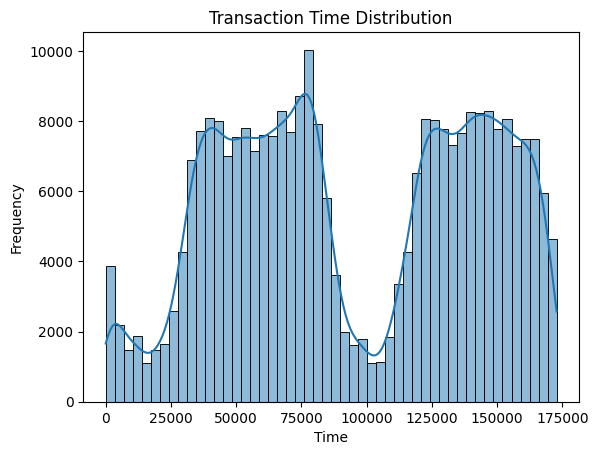

In [14]:
sns.histplot(df["Time"], bins=50, kde=True)
plt.title("Transaction Time Distribution")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

<h2>Models Building</h2>

<h3>Import necessary libary into project</h3>

In [50]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.utils import resample

In [51]:
#Copy data from dataframe
new_data = df.copy() 

In [52]:
# Separate data between normally and abnormally
normaly = new_data[new_data["Class"] == 0]
annormaly = new_data[new_data["Class"] == 1]

# Reduce the size of all data while remaining annormal with 400 data.
annormaly_downsampler = resample(annormaly, replace=True, n_samples=400, random_state=42)
downsampler_data = pd.concat([normaly, annormaly_downsampler])

In [53]:
# Comparison between two classes
downsampler_data["Class"].value_counts()

Class
0    283253
1       400
Name: count, dtype: int64

<h3>Datasets preparation</h3>

Create independent varible as (X) and dependent variable as (y)

In [54]:
X = downsampler_data.drop(["Time", "Class"], axis=1) # X without column Time and Class
y = downsampler_data["Class"]

Split data to train and test sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
# Fitting model with train data
model = IsolationForest(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<b>Note: </b>Isolation Forest gives back two classes is 1 means normal and -1 means abnormal.<br>
But we have 0 as normal and 1 as abnormal. So we need to swap an output first.

In [58]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

<h3>Visualize confusion matrix</h3>
<img src="https://miro.medium.com/v2/resize:fit:816/1*GPrgyxOQDoKwTW8_AreUjQ.png"></img>

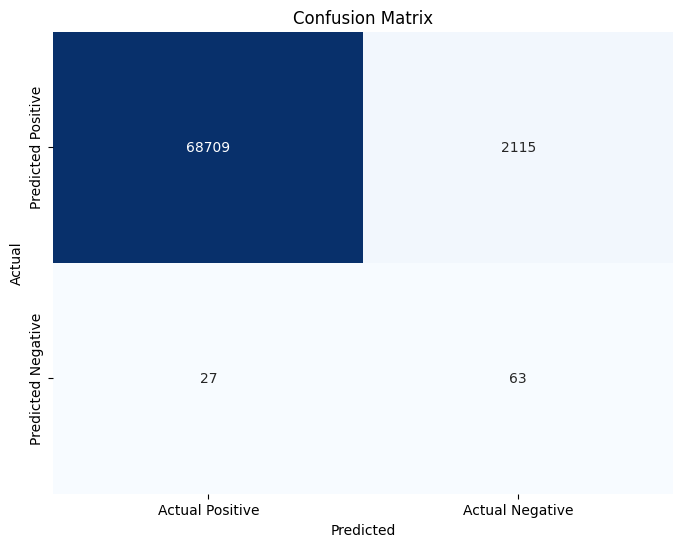

In [96]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Predicted Positive', 'Predicted Negative'], 
                     columns=['Actual Positive', 'Actual Negative'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy score

In [60]:
accuracy_score(y_test, y_pred)

0.9697943988493104

<h3>Classification report</h3>
<img src="https://miro.medium.com/v2/resize:fit:596/1*yDE6_iC86hTsY1NzmA1cHQ.jpeg" />

In [61]:
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     70824
           1       0.03      0.70      0.06        90

    accuracy                           0.97     70914
   macro avg       0.51      0.84      0.52     70914
weighted avg       1.00      0.97      0.98     70914



Ref: <a href="https://www.nerd-data.com/precision-recall-reallife/">https://www.nerd-data.com/precision-recall-reallife/</a>

<h2>Building second model</h2>
Description: For this model, I am using it for labeling data without training the model.

In [83]:
data_set = df.drop("Class", axis=1)
feature = data_set.copy()

# Contamination = 0.01 means I expect 1% of all data to be abnormal 
model2 = IsolationForest(contamination=0.01, random_state=42)

In [84]:
model2.fit(data_set)

IsolationForest(contamination=0.01, random_state=42)

Decision function returns a score that can identify whether the data is abnormal or not (the score has a value between -2 to 2)

In [85]:
data_set["Anomaly_Score"] = model2.decision_function(feature)
data_set["Anomaly"] = model2.predict(feature)

In [86]:
data_set["Anomaly"].value_counts()

Anomaly
 1    280888
-1      2838
Name: count, dtype: int64

<h2>Visualize shows anomaly score</h2>

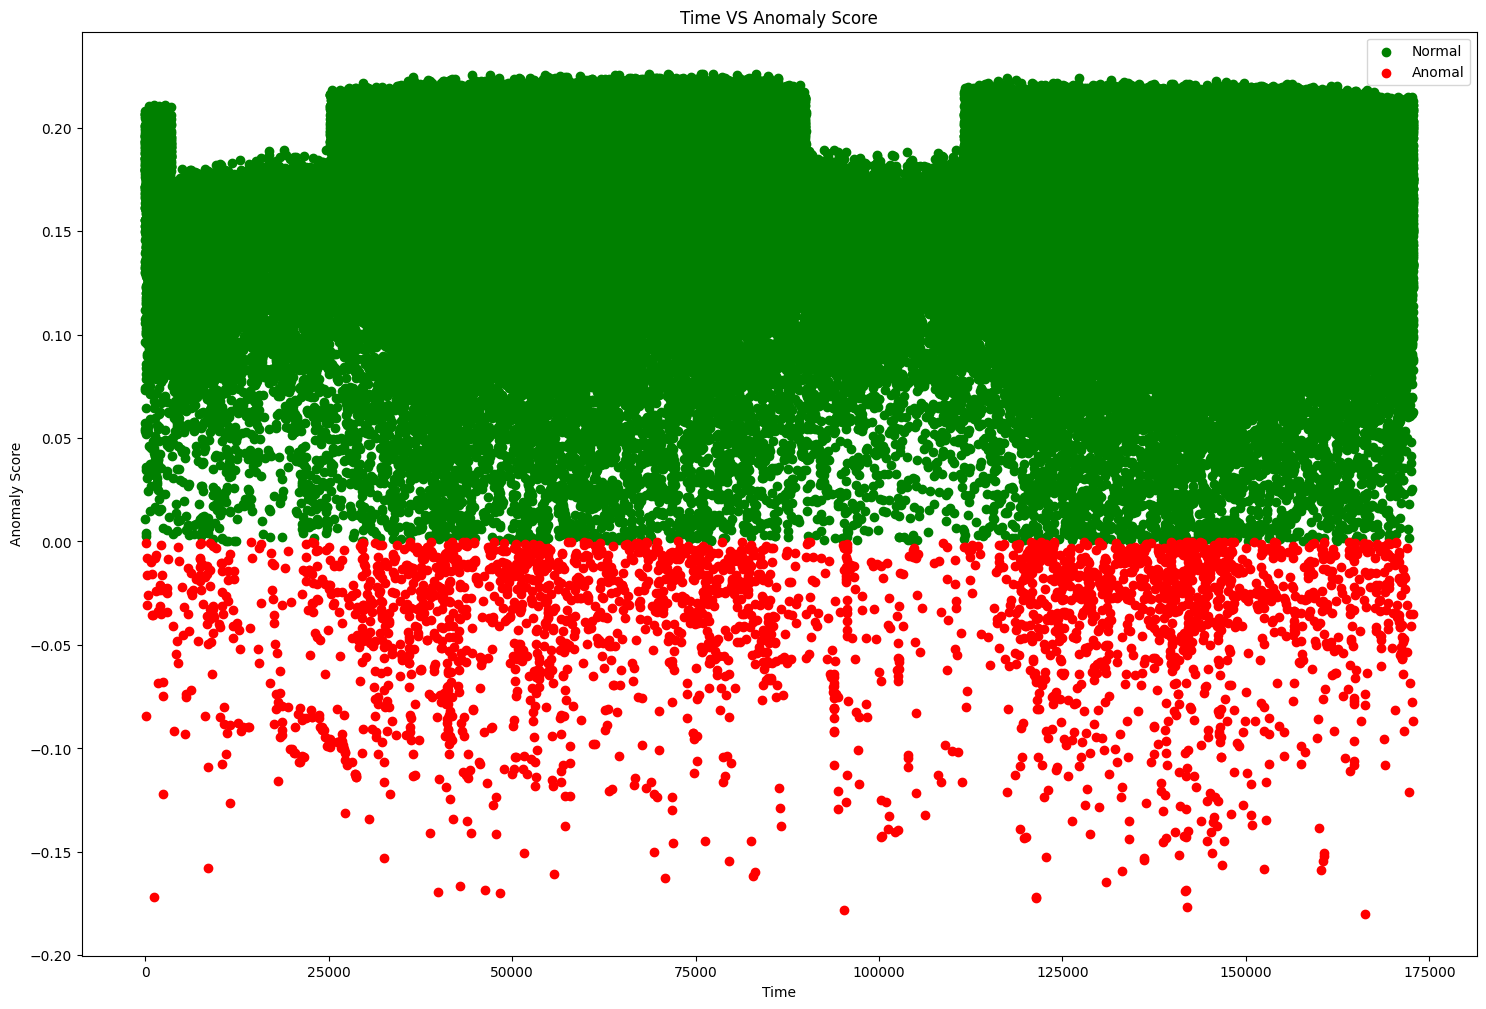

In [98]:
normal = data_set[data_set["Anomaly"] == 1]
anomal = data_set[data_set["Anomaly"] == -1]

plt.figure(figsize=(18,12))

plt.title("Time VS Anomaly Score")
plt.scatter(normal["Time"], normal["Anomaly_Score"], label="Normal", c="green")
plt.scatter(anomal["Time"], anomal["Anomaly_Score"], label="Anomal", c="red")
plt.xlabel("Time")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()